In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


In [2]:
data_path = '../Materials/data/'

In [37]:
data_path = '../Materials/data/'
df = pd.read_csv(data_path+'Cas3_total.csv')
ind_dg = df['vr'] <= -300
dg = df[ind_dg]
vr_cas3_dg = np.array(dg['vr'])
vr_err_cas3_dg = np.array(dg['e_vr'])

print (len(vr_cas3_dg))

rh = np.loadtxt(data_path+'rh_chains/CasIII_rh_chain.txt')
print (len(rh))

212
990016


In [9]:
# for each pair of (mean(vr), dispersion(vr)), we define the following function to calculate the log(L) for all the stars in the dwarf galaxy Cas III
def log_Likelihood(mvr, dvr, vr_dg, vr_dg_err):

    sigma = np.sqrt(dvr**2 + vr_dg_err**2)

    logL = np.sum(np.log(1/(sigma * np.sqrt(2 * np.pi))) - ((vr_dg - mvr)**2) / (2 * sigma**2))

    return logL

In [11]:
mvr0 = -400.0
dvr0 = 25.0
logL0 = log_Likelihood(mvr0, dvr0, vr_cas3_dg, vr_err_cas3_dg)
step_mvr = 2.0
step_dvr = 1.0
nsteps = 100000

mvr_steps = [mvr0]
dvr_steps = [dvr0]
logL_steps = [logL0]

accepts = []

In [12]:
for i in range(nsteps):


    mvr_steps.append(mvr0)
    dvr_steps.append(dvr0)
    logL_steps.append(logL0)

    mvr1 = mvr0
    dvr1 = dvr0
    logL1 = logL0

    mvr1 = mvr1 + np.random.normal(0, step_mvr)
    dvr1 = dvr1 + np.random.normal(0, step_dvr)
    logL1 = log_Likelihood(mvr1, dvr1, vr_cas3_dg, vr_err_cas3_dg)

    if logL1 > logL0:

        mvr0 = mvr1
        dvr0 = dvr1
        logL0 = logL1
        accepts.append(1)

    else:

        a = np.random.uniform(0, 1)
        if (logL1-logL0) > np.log(a):

            mvr0 = mvr1
            dvr0 = dvr1
            logL0 = logL1
            accepts.append(1)  

0.22768


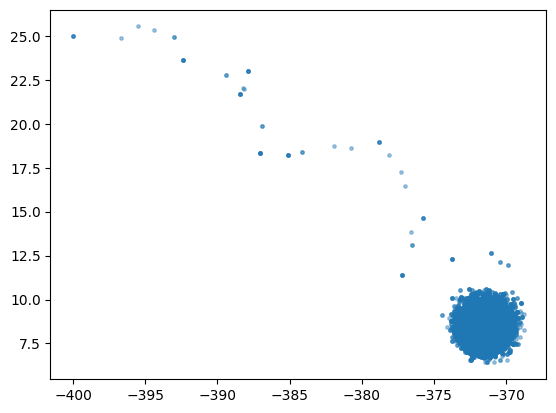

In [14]:
print(len(accepts)/nsteps)
plt.figure()

plt.scatter(mvr_steps, dvr_steps, s=6, alpha=0.4)


In [18]:
chain = np.vstack((mvr_steps, dvr_steps, logL_steps)).T[int(nsteps*0.1):]


7.9
8.4
8.9


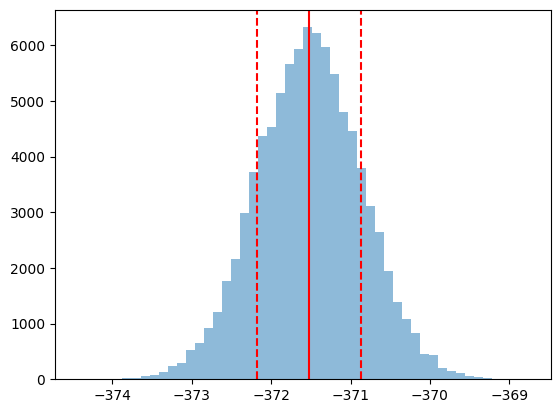

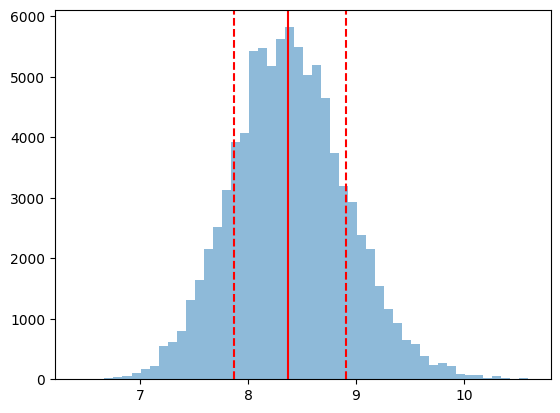

In [34]:
plt.figure()
plt.hist(chain[:,0], bins=50, alpha=0.5, label='mvr');
plt.axvline(np.percentile(chain[:,0], 16), color='red', linestyle='--', label='16th percentile')
plt.axvline(np.percentile(chain[:,0], 50), color='red', linestyle='-', label='50th percentile')
plt.axvline(np.percentile(chain[:,0], 84), color='red', linestyle='--', label='84th percentile')
plt.figure()
plt.hist(chain[:,1], bins=50, alpha=0.5, label='dvr');
plt.axvline(np.percentile(chain[:,1], 16), color='red', linestyle='--', label='16th percentile')
plt.axvline(np.percentile(chain[:,1], 50), color='red', linestyle='-', label='50th percentile')
plt.axvline(np.percentile(chain[:,1], 84), color='red', linestyle='--', label='84th percentile')

print ("%.1f"%np.percentile(chain[:,1], 16))
print ("%.1f"%np.percentile(chain[:,1], 50))
print ("%.1f"%np.percentile(chain[:,1], 84))


Distance modulus:

Cas III:   24.45+/-0.14

Lac I:     24.40+/-0.12

Per I:     24.49+/-0.18

dist_modulus = 5log_10(D(pc)) - 5

rh (arcmin) -> rh (pc)

M(Msun) = 580 x rh(pc) x sigma_{vr}^2

Cas III: Mv = -12.3+- 0.7

Lv/Lv,sun = 10**(-0.4)(Mv-4.83)



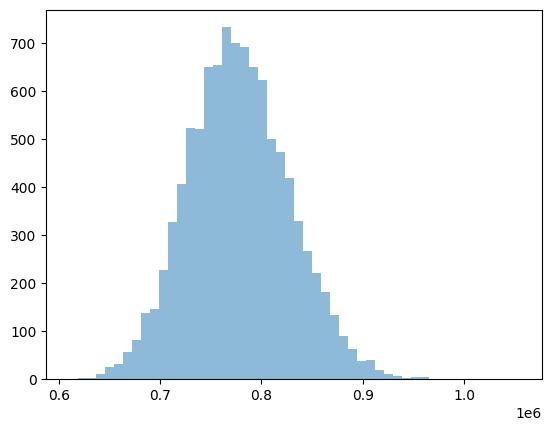

In [24]:
dm_cas3 = np.random.normal(24.45, 0.14, 10000)

d_cas3 = 10**((dm_cas3+5)/5)

plt.figure()
plt.hist(d_cas3, bins=50, alpha=0.5, label='d_cas3');

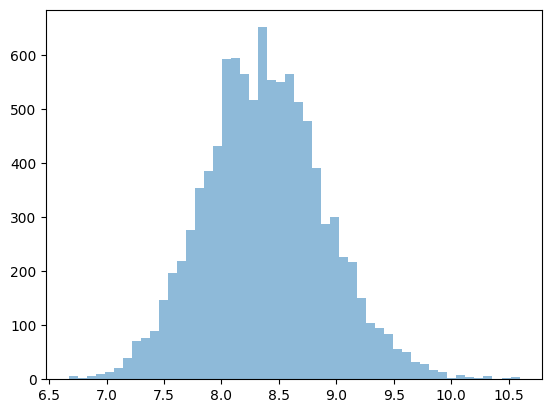

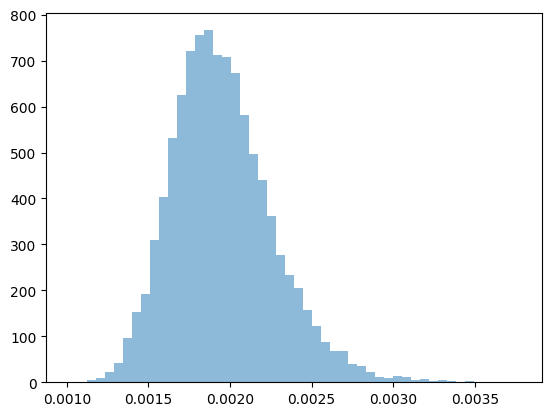

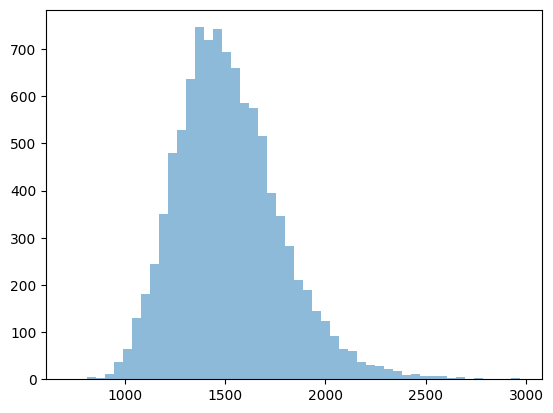

In [79]:
dvr_cas3 = np.random.choice(chain[:,1], size=10000)
rh_cas3 = np.random.choice(rh, size=10000)/60/180*np.pi


plt.figure()
plt.hist(dvr_cas3, bins=50, alpha=0.5, label='vr_cas3');



plt.figure()
plt.hist(rh_cas3, bins=50, alpha=0.5, label='rh_cas3');



plt.figure()
plt.hist(d_cas3*np.tan(rh_cas3), bins=50, alpha=0.5, label='rh_cas3');



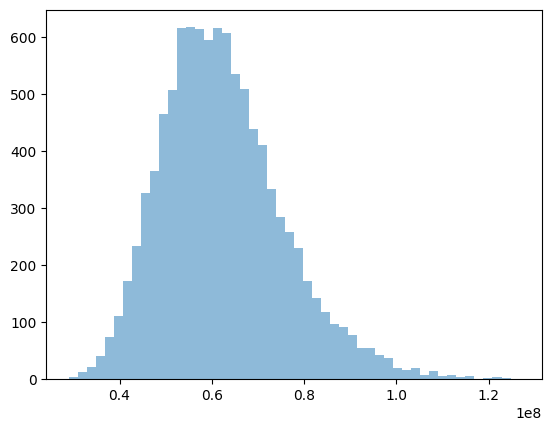

In [46]:
mtot_cas3 = 580*d_cas3*np.tan(rh_cas3)*dvr_cas3**2.

plt.figure()
plt.hist(mtot_cas3, bins=50, alpha=0.5, label='mtot_cas3');

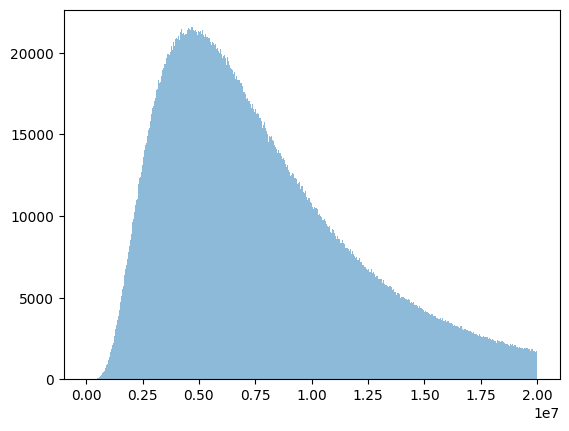

In [64]:
mv_cas3 = np.random.normal(-12.3, 0.7, 10000000)
Lv_cas3 = 10**(-(mv_cas3 -4.83)/2.5)

plt.figure()
plt.hist(Lv_cas3, bins=1000, alpha=0.5, range=(0, 2e7), label='Lv_cas3');

In [75]:
f, nbins = np.histogram(Lv_cas3, bins=1000, range=(0, 2e7))
print (len(nbins), len(f))


1001 1000


In [76]:
ind1 = f >= np.exp(-0.5)*f.max()


In [78]:

print ("%.1e"%nbins[1:][ind1][0], "%.1e"%nbins[1:][ind1][-1])
ind_max = np.argmax(f)
print ("%.1e"%nbins[ind_max])

2.5e+06 8.9e+06
4.7e+06
